In [35]:
from tools.csv import csv_files

csv_paths = csv_files("./res/with-speed-combined")
print(csv_paths)

['./res/with-speed-combined/32.31.250.105/105_combined.csv', './res/with-speed-combined/32.31.250.103/103_combined.csv', './res/with-speed-combined/32.31.250.108/108_combined.csv', './res/with-speed-combined/32.31.250.107/107_combined.csv']


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to perform traffic data analysis and visualization
def traffic_data_analysis(csv_path, plot_title, arg):
    # Read CSV data
    data = pd.read_csv(csv_path)

    # Remove rows where Speed is 0
    data = data[data['Speed'] > 0]

    # Convert Frame to Time in minutes (1 minute = 200 frames)
    data['Time (minutes)'] = data['Frame'] / arg

    # Compute congestion index (as a simplified formula: Flow / Density)
    data['Congestion Index'] = data['Flow'] / data['Density']

    # Calculate key statistics
    mean_flow = data['Flow'].mean()
    peak_flow = data['Flow'].max()
    mean_speed = data['Speed'].mean()
    mean_density = data['Density'].mean()
    mean_congestion = data['Congestion Index'].mean()

    print(f'Average Flow: {mean_flow}')
    print(f'Peak Flow: {peak_flow}')
    print(f'Average Speed: {mean_speed}')
    print(f'Average Density: {mean_density}')
    print(f'Average Congestion Index: {mean_congestion}')

    # Create subplots for Flow, Density, Speed, and Congestion Index trends over Time
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    # Set the title for the entire figure
    fig.suptitle(f"Data Analyze ({plot_title})", fontsize=16)

    # Plot Flow vs Time
    axs[0].plot(data['Time (minutes)'], data['Flow'], color='b', label='Flow')
    axs[0].axhline(y=mean_flow, color='r', linestyle='--', label=f'Average Flow: {mean_flow:.2f}')
    axs[0].set_title('Flow vs Time (minutes)')
    axs[0].set_xlabel('Time (minutes)')
    axs[0].set_ylabel('Flow')
    axs[0].grid(True)
    axs[0].legend()

    # Plot Density vs Time
    axs[1].plot(data['Time (minutes)'], data['Density'], color='g', label='Density')
    axs[1].axhline(y=mean_density, color='r', linestyle='--', label=f'Average Density: {mean_density:.2f}')
    axs[1].set_title('Density vs Time (minutes)')
    axs[1].set_xlabel('Time (minutes)')
    axs[1].set_ylabel('Density')
    axs[1].grid(True)
    axs[1].legend()

    # Plot Speed vs Time
    axs[2].plot(data['Time (minutes)'], data['Speed'], color='r', label='Speed')
    axs[2].axhline(y=mean_speed, color='r', linestyle='--', label=f'Average Speed: {mean_speed:.2f}')
    axs[2].set_title('Speed vs Time (minutes)')
    axs[2].set_xlabel('Time (minutes)')
    axs[2].set_ylabel('Speed')
    axs[2].grid(True)
    axs[2].legend()

    # Plot Congestion Index vs Time
    # axs[3].plot(data['Time (minutes)'], data['Congestion Index'], color='purple', label='Congestion Index')
    # axs[3].axhline(y=mean_congestion, color='r', linestyle='--', label=f'Average Congestion Index: {mean_congestion:.2f}')
    # axs[3].set_title('Congestion Index vs Time (minutes)')
    # axs[3].set_xlabel('Time (minutes)')
    # axs[3].set_ylabel('Congestion Index')
    # axs[3].grid(True)
    # axs[3].legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

In [37]:
for csv in csv_paths:
    ip_addr = csv.split("/")[-2]
    print(ip_addr)

32.31.250.105
32.31.250.103
32.31.250.108
32.31.250.107


32.31.250.105
Average Flow: 6.179453836150845
Peak Flow: 16
Average Speed: 4.195307940945646
Average Density: 7.947984395318596
Average Congestion Index: 0.7489463143798414


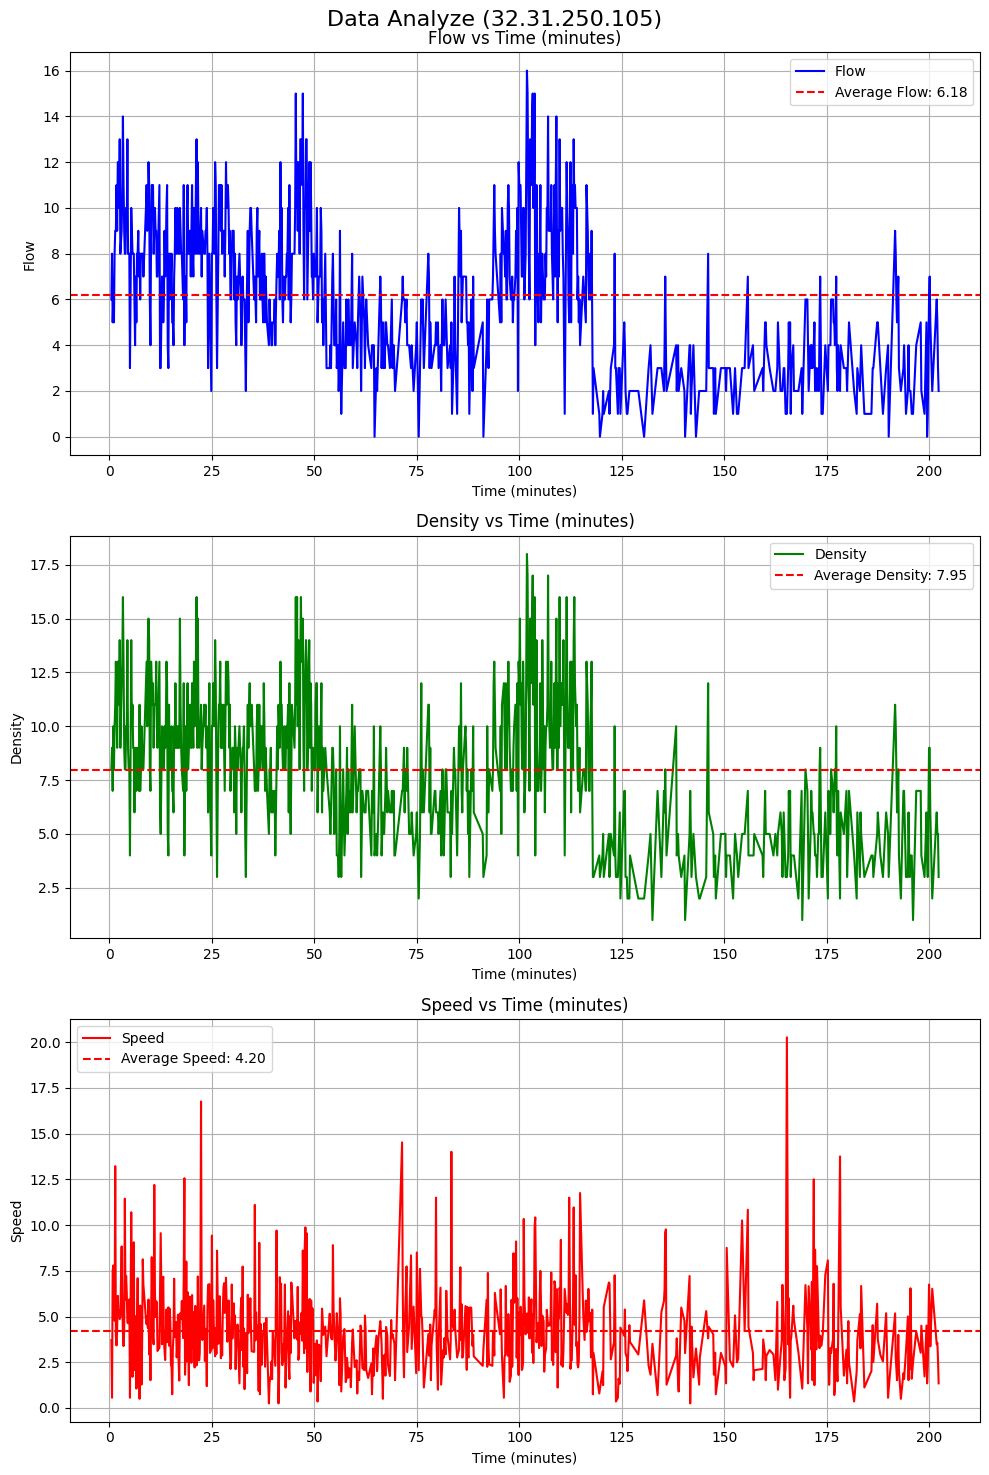

32.31.250.103
Average Flow: 4.944015444015444
Peak Flow: 12
Average Speed: 5.483415901869641
Average Density: 9.563706563706564
Average Congestion Index: 0.4748281530844556


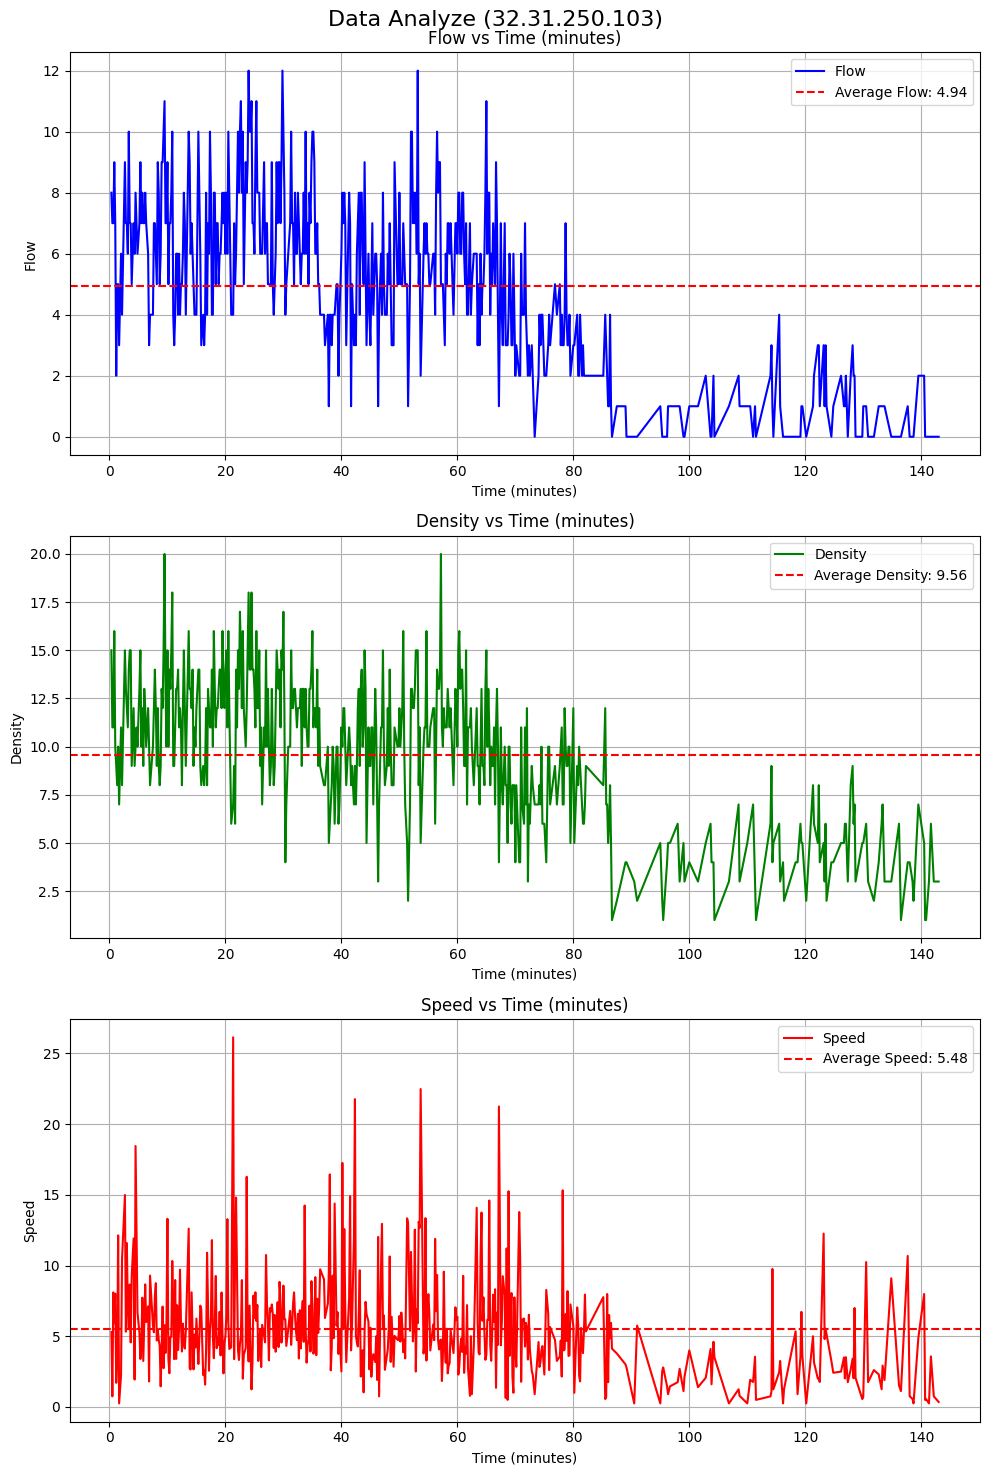

32.31.250.108
Average Flow: 7.18531976744186
Peak Flow: 14
Average Speed: 6.843512570543567
Average Density: 7.194767441860465
Average Congestion Index: 0.9988980778588336


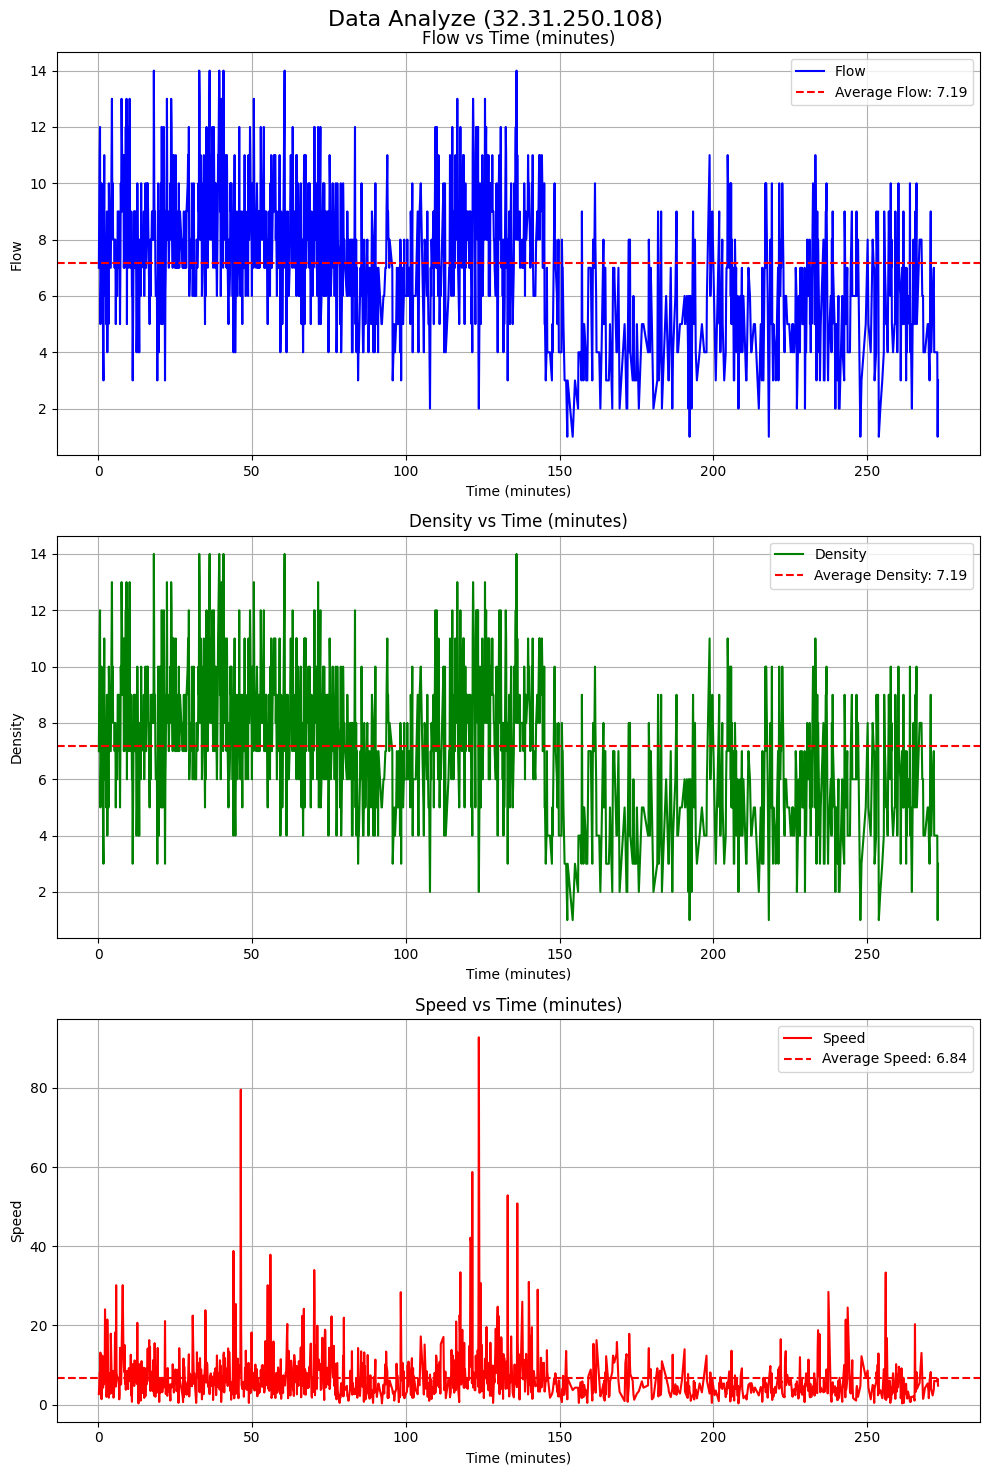

32.31.250.107
Average Flow: 7.043939393939394
Peak Flow: 15
Average Speed: 5.898484761697552
Average Density: 7.4378787878787875
Average Congestion Index: 0.9451297486307514


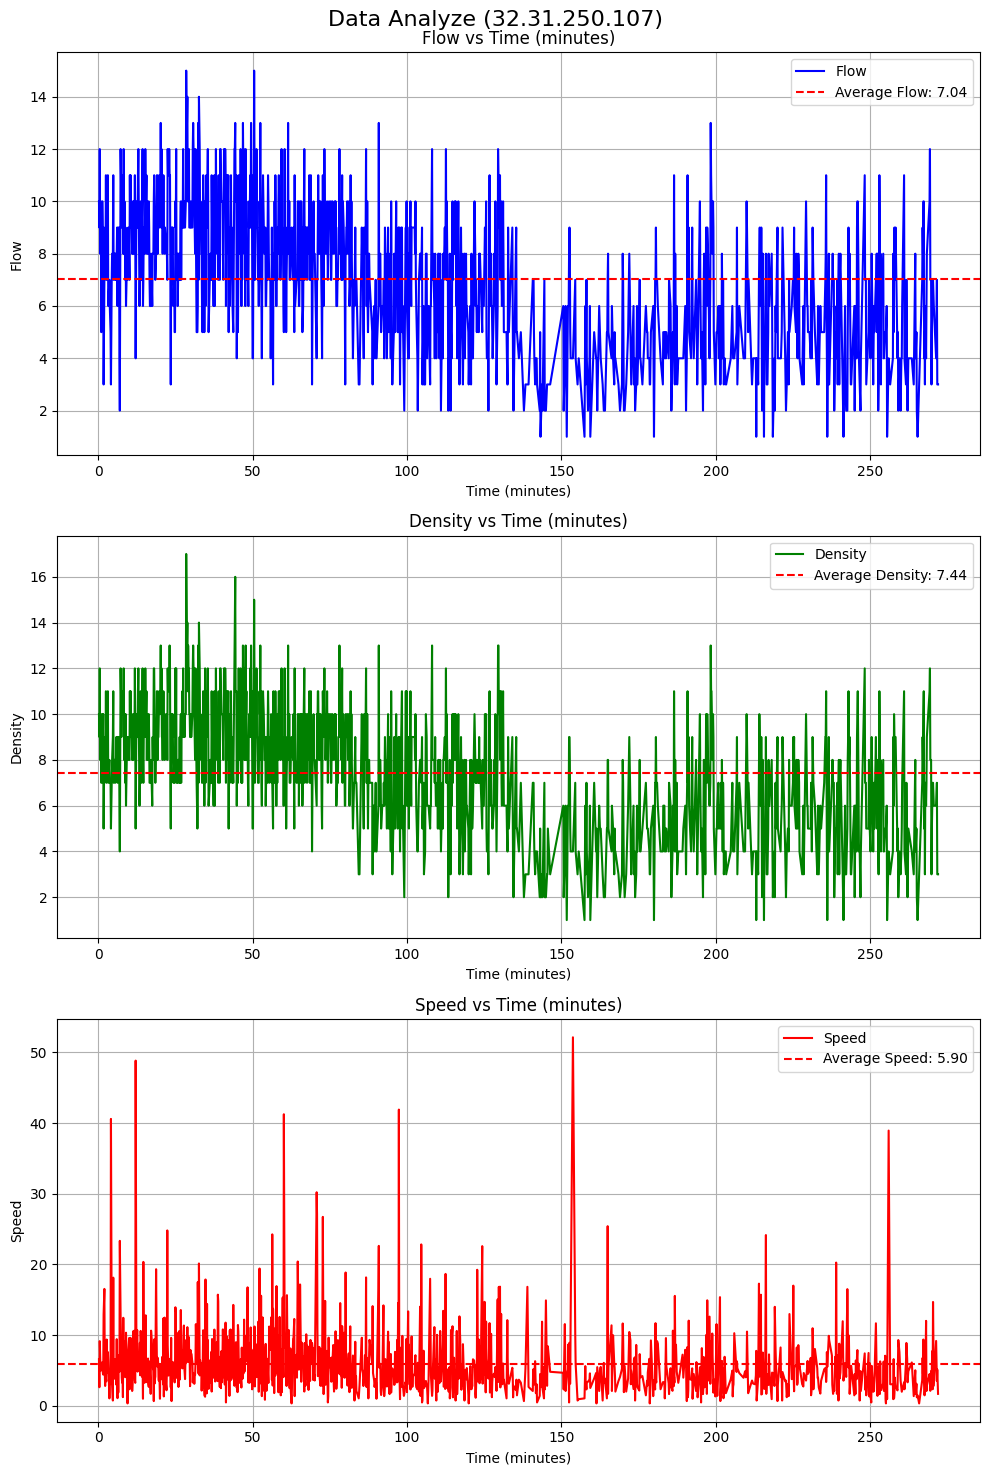

In [38]:
args = [160.0, 150.0, 200.0, 200.0]
i = 0
for csv in csv_paths:
    ip_addr = csv.split("/")[-2]
    print(ip_addr)
    traffic_data_analysis(csv, ip_addr, args[i])
    i+=1
    pass

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to perform traffic data analysis and visualization
def traffic_data_analysis_congestion(csv_path, plot_title, frames_per_minute):
    # Read CSV data
    data = pd.read_csv(csv_path)

    # Remove rows where Speed is 0
    data = data[data['Speed'] > 0]

    # Convert Frame to Time in minutes (1 minute = frames_per_minute frames)
    data['Time (minutes)'] = data['Frame'] / frames_per_minute

    # Compute congestion index (as a simplified formula: Flow / Density)
    data['Congestion Index'] = data['Flow'] / data['Density']

    # Calculate key statistics
    mean_congestion = data['Congestion Index'].mean()

    print(f'Average Congestion Index: {mean_congestion}')

    # Create a plot for Congestion Index trends over Time
    plt.figure(figsize=(10, 5))
    plt.plot(data['Time (minutes)'], data['Congestion Index'], color='purple', label='Congestion Index')
    plt.axhline(y=mean_congestion, color='red', linestyle='--', label=f'Average Congestion Index: {mean_congestion:.2f}')
    plt.title(f'Congestion Index vs Time (minutes) ({plot_title})')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Congestion Index')
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()


32.31.250.105
Average Congestion Index: 0.7489463143798414


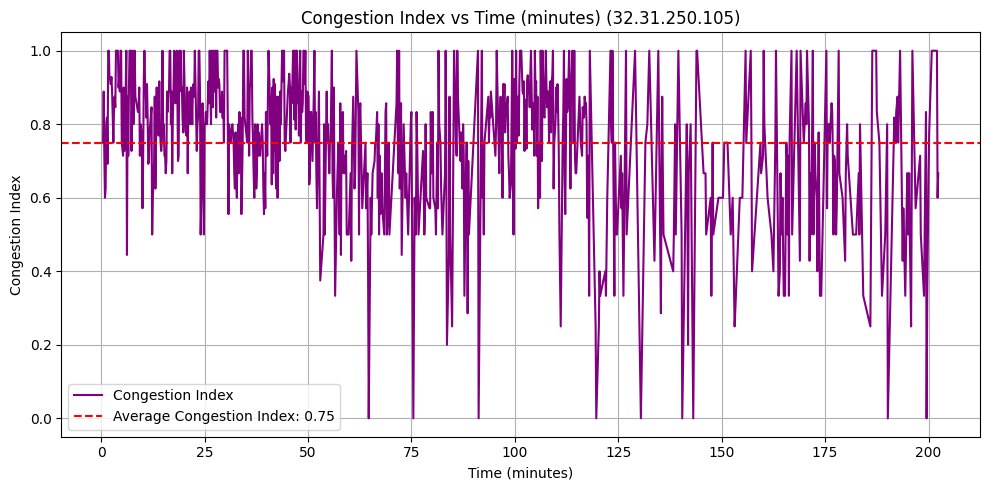

32.31.250.103
Average Congestion Index: 0.4748281530844556


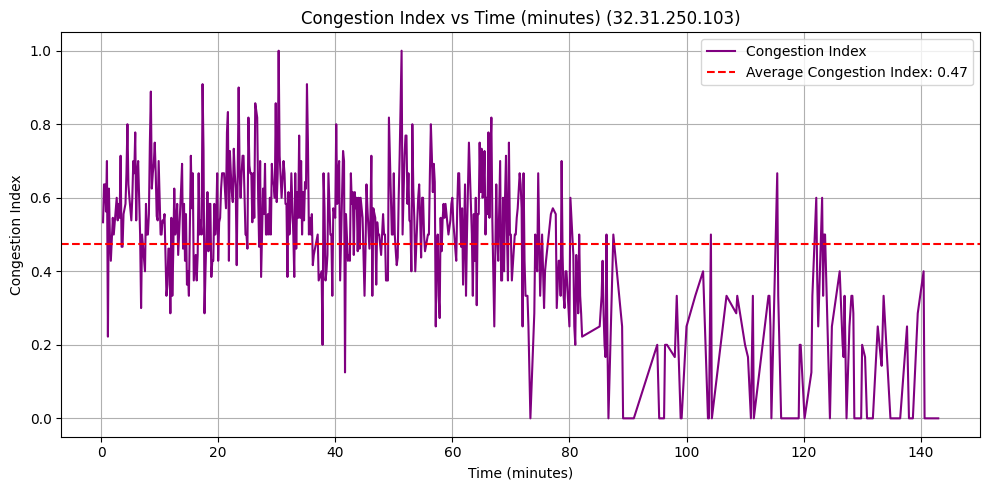

32.31.250.108
Average Congestion Index: 0.9988980778588336


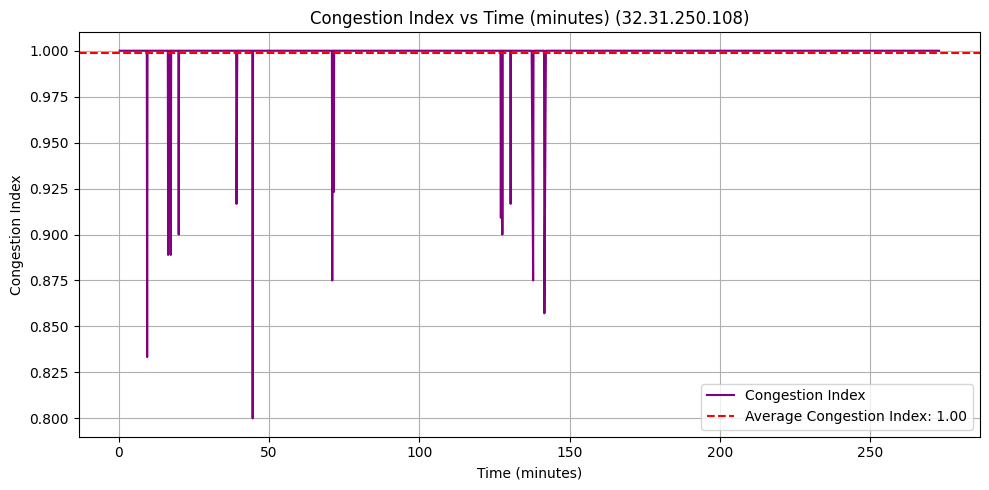

32.31.250.107
Average Congestion Index: 0.9451297486307514


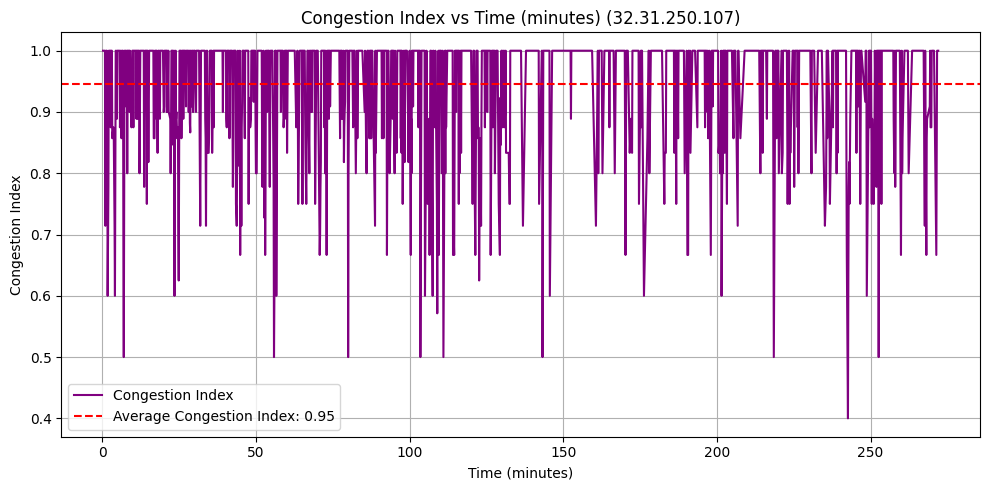

In [44]:
args = [160.0, 150.0, 200.0, 200.0]
i = 0
for csv in csv_paths:
    ip_addr = csv.split("/")[-2]
    print(ip_addr)
    traffic_data_analysis_congestion(csv, ip_addr, args[i])
    i+=1
    pass